# 1) Background
Did the number, structure and price of Air B'n'B listings for London change in response to easing lockdown measures in 2021?
## UK lockdown measures in 2021
Up to June 2021:
https://www.instituteforgovernment.org.uk/charts/uk-government-coronavirus-lockdowns

## Hypotheses
Stricter lockdown measures may affect host and guest behaviour. In particular, it may affect
- The number of listings (hypothesis: fewer)
- The type of listings (hypothesis: increase in prpoportion of listings offering whole place vs shared)
- The price (hypothesis: increase in price to reflect additional cleaning and security costs)
[might be better to phrase this the other way around, as lockdown measures were easing from January - July.]

# Method
## Data
Comparison of number of listings, type of listing and price of listing [does price need to be adjusted for something, e.g. price per person?] for January 2021 and July 2021. Potentially extend to time series analysis covering January - July [no data available for May].
## Analysis
- Categorising lockdown measures into "milder" and "stronger" based on whether they are easing or tightening [based on graph referenced above].
(- Summary statistics: counts, means, medians, measures of dispersion) [less interested in this so doing this later - but good to do for sense check etc.]
- Graphs: plotting stats against level of restrictions [still thinking about the best way of doing this]

## Handling missing data
Add.

# 2) Set up

## Installing packages

In [275]:
#%pip install missingno

## Loading packages

In [276]:
import numpy as np
import pandas as pd
#import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns

#package for visualising missing data
import missingno as msno


from sklearn.preprocessing import LabelEncoder

## Loading Air BnB data


In [277]:
# as temporary dfs initially as will be dropping vars later
# January
temp_l1 = pd.read_csv('data/listings_1.csv', delimiter=',')
# February etc.
temp_l2 = pd.read_csv('data/listings_2.csv', delimiter=',')
temp_l3 = pd.read_csv('data/listings_3.csv', delimiter=',')
temp_l4 = pd.read_csv('data/listings_4.csv', delimiter=',')
# Data for May not available 
temp_l6 = pd.read_csv('data/listings_6.csv', delimiter=',')
temp_l7 = pd.read_csv('data/listings_7.csv', delimiter=',')

In [278]:
temp_l1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77346 entries, 0 to 77345
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            77346 non-null  int64  
 1   listing_url                                   77346 non-null  object 
 2   scrape_id                                     77346 non-null  int64  
 3   last_scraped                                  77346 non-null  object 
 4   name                                          77322 non-null  object 
 5   description                                   74208 non-null  object 
 6   neighborhood_overview                         47456 non-null  object 
 7   picture_url                                   77346 non-null  object 
 8   host_id                                       77346 non-null  int64  
 9   host_url                                      77346 non-null 

Variables of interest for later:


calculated_host_listings_count 
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms 
calculated_host_listings_count_shared_rooms

# 2) Data preparation
Looking at January and July datasets to start with, can extend this later.

## Reducing number of vars in dataset

Keeping only variables that seems relevant to the questions at hand

In [279]:
# Various attempts at either dropping ranges of columns, or keeping ranges of columns, but not sure how to do that

#cols = [[:, 0:30], 35, 48, 54:59, 67]
#cols = [0:30,35, 48, 67]
#l1.drop(l1.iloc[:, 0:30],axis=1,inplace=True)
#l1.info(verbose=True)
#l1 = l1.drop(l1.iloc[:, 54:59],axis=1,inplace=True)
#l1.drop(l1.columns[cols],axis=1,inplace=True)


# list of variables to keep
#keep_vars = ['property_type','room_type','accommodates','bathrooms', 'bedrooms','beds', 'amenities','price','minimum_nights','maximum_nights','has_availability','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month']
keep_vars = ['property_type','room_type','accommodates','bathrooms', 'bedrooms','beds', 'amenities','price','minimum_nights','maximum_nights','has_availability','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']


l1 = temp_l1.loc[:, keep_vars]
# adding a column to identify the dataset

l1['month'] = str("January")

l7 = temp_l7.loc[:, keep_vars]
l7['month'] = str("July")

# How can I add this variable without turning it into an object?

l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77346 entries, 0 to 77345
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                77346 non-null  object 
 1   room_type                    77346 non-null  object 
 2   accommodates                 77346 non-null  int64  
 3   bathrooms                    0 non-null      float64
 4   bedrooms                     72458 non-null  float64
 5   beds                         76165 non-null  float64
 6   amenities                    77346 non-null  object 
 7   price                        77346 non-null  object 
 8   minimum_nights               77346 non-null  int64  
 9   maximum_nights               77346 non-null  int64  
 10  has_availability             77346 non-null  object 
 11  review_scores_accuracy       53097 non-null  float64
 12  review_scores_cleanliness    53106 non-null  float64
 13  review_scores_ch

## Merging datasets (append)


In [280]:
# Leap of faith here that the columns are of the same type in all datasets. Probably need to check this.

df = l1.append(l7, ignore_index=True)
#print(df.head(5))
#print(df.tail(5))
print(df['price'])

0          $89.00
1          $40.00
2          $75.00
3         $307.00
4         $150.00
           ...   
150705    $276.00
150706    $117.00
150707     $48.00
150708     $56.00
150709     $32.00
Name: price, Length: 150710, dtype: object


In [281]:
# Shape of final df

print(f"The final data frame has {df.shape[0]} rows and {df.shape[1]} columns.")

The final data frame has 150710 rows and 19 columns.


In [282]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,150710.000000,0.0,141170.000000,148308.000000,150710.000000,1.507100e+05,102271.000000,102291.000000,102182.000000,102269.000000,102181.000000,102176.000000,105692.000000
mean,3.038106,NaN,1.484997,1.696753,5.512222,1.767940e+04,7.219897,7.039637,7.313686,7.332306,7.244244,7.056218,0.613430
std,1.936590,NaN,0.879192,1.280531,24.399767,3.885942e+06,2.533092,2.514336,2.537662,2.538404,2.500537,2.485248,1.014544
min,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.000000,NaN,1.000000,1.000000,1.000000,3.100000e+01,4.910000,4.820000,4.970000,5.000000,4.890000,4.780000,0.100000
50%,2.000000,NaN,1.000000,1.000000,2.000000,1.125000e+03,8.000000,7.000000,8.000000,8.000000,8.000000,7.000000,0.300000
75%,4.000000,NaN,2.000000,2.000000,4.000000,1.125000e+03,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.780000
max,16.000000,NaN,50.000000,50.000000,1125.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,67.000000


### Encoding variables

Variables that need to be encoded:
- property_type
- room_type
- amenities
- price
- has_availability
- month

In [283]:
# looking at these more closely
df['property_type']

0                  Entire apartment
1         Private room in apartment
2                  Entire apartment
3                  Entire apartment
4         Private room in townhouse
                    ...            
150705             Entire apartment
150706             Entire apartment
150707             Entire apartment
150708             Entire apartment
150709        Private room in house
Name: property_type, Length: 150710, dtype: object

In [284]:
df['room_type']
# This seems to be more useful than the variable above. 

0         Entire home/apt
1            Private room
2         Entire home/apt
3         Entire home/apt
4            Private room
               ...       
150705    Entire home/apt
150706    Entire home/apt
150707    Entire home/apt
150708    Entire home/apt
150709       Private room
Name: room_type, Length: 150710, dtype: object

In [285]:
#using room_type instead
df = df.drop('property_type', axis = 1)

In [286]:
le = LabelEncoder()
#df['property_type'] = le.fit_transform(df.property_type.values)
df['room_type'] = le.fit_transform(df.room_type.values)
df['has_availability'] = le.fit_transform(df.has_availability.values)
df['month'] = le.fit_transform(df.month.values)



# Another way of doing the above:
#df['room_type_cat'] = df['room_type'].astype("category")


In [287]:
# amenities needs to be coded as several dummies

# Initially did this:
# Turn into dummies
#pd.get_dummies(df['amenities'])

# Result shows that this isn't the right thing to do. Other things I've tried (but doesn't address the list issue).



# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

#from sklearn.preprocessing import MultiLabelBinarizer
#mlb = MultiLabelBinarizer()
#s = df['amenities']
# df['amenities'] = le.fit_transform(df.amenities.values)


# This one probably works, but takes ages and kills the kernel:
#pd.get_dummies(df['amenities'].explode()).sum(level=0)

# The level keyword is deprecated. Note says to use groupby instead.: 
#df.sum(level=1) should use df.groupby(level=1).sum()

# Leaving this for the moment.

In [288]:
# Finally got this to work, but don't understand why the second line isn't sufficient?

# removing the commas
df["price"] = [(str(i).replace(",", "")) for i in df["price"]]
# removing dollar sign mainly
df.insert(7, "price_num", df['price'].str.strip("$,' ").astype('float'))

In [289]:
# Dropping old price var
df = df.drop('price', axis=1)

In [290]:
# Dropping amenities because this needs more work
df = df.drop('amenities', axis=1)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150710 entries, 0 to 150709
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   room_type                    150710 non-null  int64  
 1   accommodates                 150710 non-null  int64  
 2   bathrooms                    0 non-null       float64
 3   bedrooms                     141170 non-null  float64
 4   beds                         148308 non-null  float64
 5   price_num                    150710 non-null  float64
 6   minimum_nights               150710 non-null  int64  
 7   maximum_nights               150710 non-null  int64  
 8   has_availability             150710 non-null  int64  
 9   review_scores_accuracy       102271 non-null  float64
 10  review_scores_cleanliness    102291 non-null  float64
 11  review_scores_checkin        102182 non-null  float64
 12  review_scores_communication  102269 non-null  float64
 13 

## Exploring missing data in the combined df

In [292]:
#Columns with missing values:
# saving to list for later use
cols_w_missing = list(df.columns[df.isnull().any()])

print(f" Missing values in columns {cols_w_missing}")

# Would be nice to know how to make this look better.

 Missing values in columns ['bathrooms', 'bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


<AxesSubplot:>

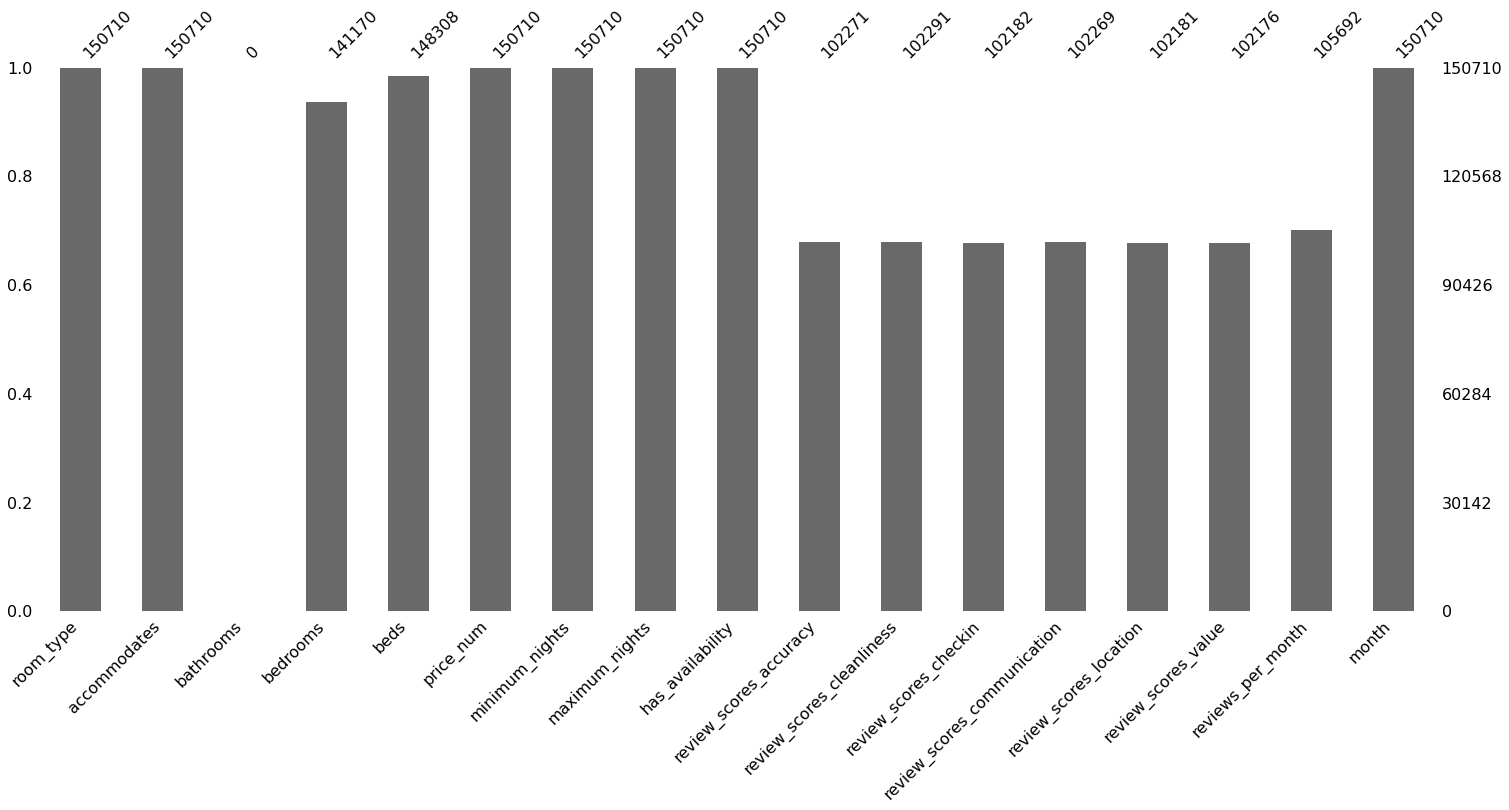

In [293]:
# Bar chart of missing data

msno.bar(df)

# This looks like there is review data missing for a chunk of cases.

<AxesSubplot:>

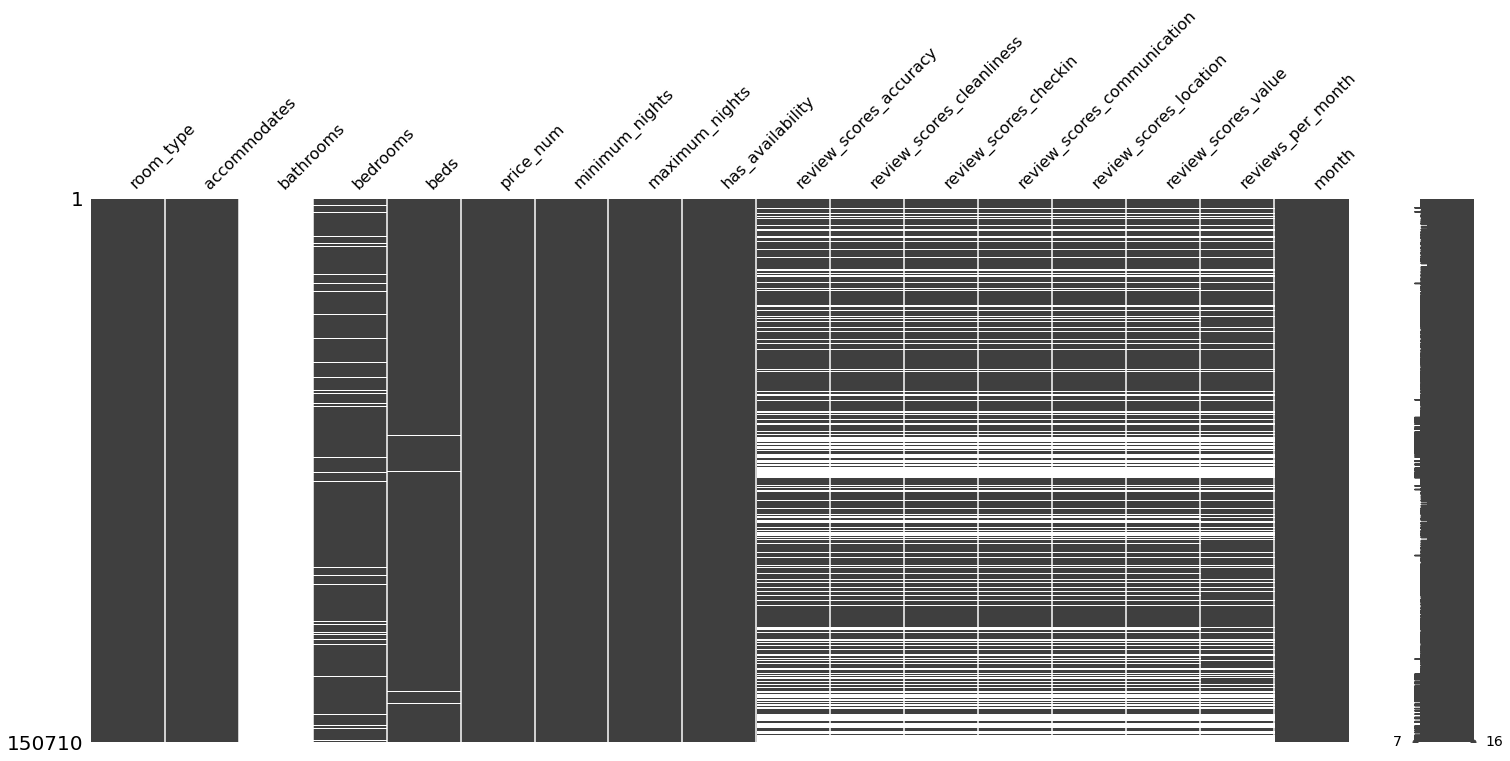

In [294]:
# Matrix plot to look at location of missing values.

msno.matrix(df)

* Bathrooms: all missing
--> Drop var
* Bedrooms: missings scattered throughout
* Beds: Only missing a few
--> Use 'accommodates' instead?
* Review scores: Seem to be missing in rows, for the most part.
--> Keep for now and think about whether this will be used in the analysis. Might be worth looking at a subset for reviews. Maybe this is linked to another variable?


In [295]:
#How many missing values?

print(df[cols_w_missing].isnull().sum())

# Lots missing in review scores. Strange! But probably not very relevant to my analysis.

bathrooms                      150710
bedrooms                         9540
beds                             2402
review_scores_accuracy          48439
review_scores_cleanliness       48419
review_scores_checkin           48528
review_scores_communication     48441
review_scores_location          48529
review_scores_value             48534
reviews_per_month               45018
dtype: int64


In [296]:
# Dropping bathrooms because all missing
df = df.drop('bathrooms', axis = 1)
#print(df.shape)


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150710 entries, 0 to 150709
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   room_type                    150710 non-null  int64  
 1   accommodates                 150710 non-null  int64  
 2   bedrooms                     141170 non-null  float64
 3   beds                         148308 non-null  float64
 4   price_num                    150710 non-null  float64
 5   minimum_nights               150710 non-null  int64  
 6   maximum_nights               150710 non-null  int64  
 7   has_availability             150710 non-null  int64  
 8   review_scores_accuracy       102271 non-null  float64
 9   review_scores_cleanliness    102291 non-null  float64
 10  review_scores_checkin        102182 non-null  float64
 11  review_scores_communication  102269 non-null  float64
 12  review_scores_location       102181 non-null  float64
 13 

In [333]:
# Need to remove NaN for below to work

df.dropna()


,room_type,accommodates,bedrooms,beds,price_num,minimum_nights,maximum_nights,price_per_person,has_availability,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,month
0,0,4,1.0,3.0,89.0,2,1125,22.250000,1,9.0,9.0,10.0,10.0,9.0,9.0,1.46,0
1,2,2,1.0,0.0,40.0,1,29,20.000000,1,10.0,10.0,10.0,10.0,9.0,9.0,0.17,0
2,0,2,1.0,1.0,75.0,10,50,37.500000,1,10.0,10.0,10.0,10.0,10.0,9.0,0.66,0
3,0,6,3.0,3.0,307.0,4,365,51.166667,1,10.0,9.0,9.0,9.0,10.0,9.0,0.35,0
5,2,2,1.0,0.0,29.0,10,1120,14.500000,1,10.0,10.0,10.0,10.0,9.0,10.0,0.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150344,2,1,1.0,0.0,45.0,1,15,45.000000,1,5.0,5.0,5.0,5.0,5.0,5.0,1.00,1
150350,0,4,1.0,2.0,347.0,2,1125,86.750000,1,5.0,5.0,5.0,5.0,5.0,5.0,3.00,1
150392,0,6,2.0,3.0,163.0,1,1125,27.166667,1,5.0,5.0,5.0,5.0,5.0,5.0,1.00,1
150447,2,2,1.0,1.0,28.0,1,1125,14.000000,1,4.0,4.0,4.0,4.0,4.0,4.0,1.00,1


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149772 entries, 0 to 150709
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   room_type                    149772 non-null  int64  
 1   accommodates                 149772 non-null  int64  
 2   bedrooms                     140371 non-null  float64
 3   beds                         147418 non-null  float64
 4   price_num                    149772 non-null  float64
 5   minimum_nights               149772 non-null  int64  
 6   maximum_nights               149772 non-null  int64  
 7   price_per_person             149772 non-null  float64
 8   has_availability             149772 non-null  int64  
 9   review_scores_accuracy       101954 non-null  float64
 10  review_scores_cleanliness    101974 non-null  float64
 11  review_scores_checkin        101865 non-null  float64
 12  review_scores_communication  101952 non-null  float64
 13 

vars to use in my analysis

* room_type
* accommodates
(could add bedrooms and beds)
* min and max nights
* has availability
* price per person accommodated



Additional for linear regression:
* review data
* host_listings_count?
* amenities

# Creating dataframe / variable of lockdown measures


In [299]:
# Not doing this now because a) may not be necessary (just looking at time trend should be enough) and b) only comparing two time points

# Summary stats

For now, doing this for room type, number of listings, price per person

In [300]:
df.describe()

,room_type,accommodates,bedrooms,beds,price_num,minimum_nights,maximum_nights,has_availability,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,month
count,150710.000000,150710.000000,141170.000000,148308.000000,150710.000000,150710.000000,1.507100e+05,150710.000000,102271.000000,102291.000000,102182.000000,102269.000000,102181.000000,102176.000000,105692.000000,150710.000000
mean,0.905892,3.038106,1.484997,1.696753,123.692973,5.512222,1.767940e+04,0.992867,7.219897,7.039637,7.313686,7.332306,7.244244,7.056218,0.613430,0.486789
std,1.003607,1.936590,0.879192,1.280531,380.009804,24.399767,3.885942e+06,0.084155,2.533092,2.514336,2.537662,2.538404,2.500537,2.485248,1.014544,0.499827
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,44.000000,1.000000,3.100000e+01,1.000000,4.910000,4.820000,4.970000,5.000000,4.890000,4.780000,0.100000,0.000000
50%,0.000000,2.000000,1.000000,1.000000,75.000000,2.000000,1.125000e+03,1.000000,8.000000,7.000000,8.000000,8.000000,8.000000,7.000000,0.300000,0.000000
75%,2.000000,4.000000,2.000000,2.000000,126.000000,4.000000,1.125000e+03,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.780000,1.000000
max,3.000000,16.000000,50.000000,50.000000,18115.000000,1125.000000,1.000000e+09,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,67.000000,1.000000


In [301]:
# Dropping rows where price is zero
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df.drop(df[df.price_num==0].index, inplace = True)

In [302]:
df.describe()

,room_type,accommodates,bedrooms,beds,price_num,minimum_nights,maximum_nights,has_availability,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,month
count,150659.000000,150659.000000,141162.000000,148300.000000,150659.000000,150659.000000,1.506590e+05,150659.000000,102255.00000,102275.000000,102166.000000,102253.000000,102165.000000,102160.000000,105676.000000,150659.000000
mean,0.905807,3.037489,1.485024,1.696790,123.734845,5.512210,1.768523e+04,0.992885,7.22031,7.040060,7.314081,7.332701,7.244623,7.056592,0.613364,0.486775
std,1.003744,1.934051,0.879210,1.280555,380.067303,24.403125,3.886600e+06,0.084053,2.53298,2.514181,2.537596,2.538321,2.500501,2.485192,1.014518,0.499827
min,0.000000,1.000000,1.000000,0.000000,7.000000,1.000000,1.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,44.000000,1.000000,3.100000e+01,1.000000,4.91000,4.820000,4.970000,5.000000,4.890000,4.780000,0.100000,0.000000
50%,0.000000,2.000000,1.000000,1.000000,75.000000,2.000000,1.125000e+03,1.000000,8.00000,7.000000,8.000000,8.000000,8.000000,7.000000,0.300000,0.000000
75%,2.000000,4.000000,2.000000,2.000000,126.000000,4.000000,1.125000e+03,1.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,0.780000,1.000000
max,3.000000,16.000000,50.000000,50.000000,18115.000000,1125.000000,1.000000e+09,1.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,67.000000,1.000000


# Graphs
All of these against the severity of lockdown measures [how to represent this in the graph?]
(1) Line graph for number of listings (not sure this is very interesting when looking at only two data points)
(2) Stacked bar charts for type of listing
(3) Line graph of mean (?) price with standard deviations as shaded areas: https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars

## Graph 1 - availability

<AxesSubplot:ylabel='has_availability'>

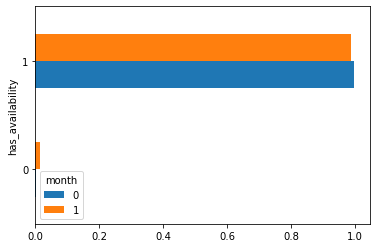

In [303]:
# Number of available listings
df.groupby('month').has_availability.value_counts(normalize = True).unstack(0).plot.barh()


## Graph 2 - room types

<AxesSubplot:ylabel='room_type'>

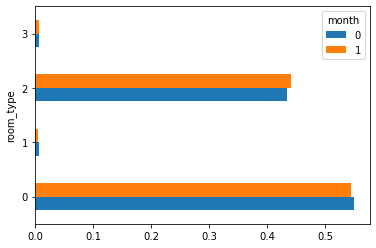

In [304]:
# Are more entire homes available vs rooms / shared?

df.groupby('month').room_type.value_counts(normalize = True).unstack(0).plot.barh()


In [305]:
# How to do this by month?

df.groupby(['room_type']).agg({'room_type':['count']})


,room_type
,count
room_type,
0,82506
1,990
2,66011
3,1152


## Graph 3 - price

<AxesSubplot:xlabel='month', ylabel='price_num'>

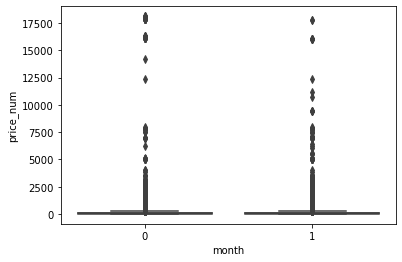

In [306]:
# # Does price go up?

# Boxplot for price (Jan and July)
sns.boxplot(x=df['month'], y=df['price_num'])

# I think there is some work to do looking at the extreme outliers here

In [307]:
# Inter quantile ranges (doesn't really make sense for categorical, but not sure how to omit)

#Q1 = df['price_num'].quantile(0.25)
#Q3 = df['price_num'].quantile(0.75)
#IQR = Q3-Q1
#print(IQR)

In [308]:
# Removing outliers - would like to do this for income var only.
#df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

In [309]:
# Quic and dirty

df.drop(df[df.price_num>1000].index, inplace = True)

<AxesSubplot:xlabel='month', ylabel='price_num'>

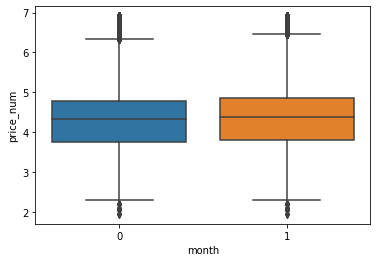

In [310]:
sns.boxplot(x=df['month'], y=np.log(df['price_num']))

# On first run, discovered that there are some zero values here, so have now removed them above.
# Seems like the mean is slightly higher. 

<AxesSubplot:xlabel='price_num', ylabel='Count'>

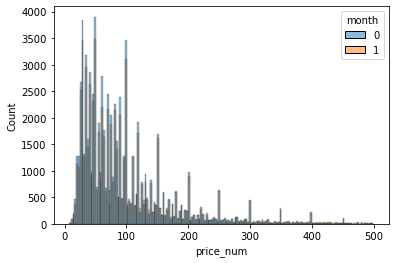

In [330]:
# How can I show this plot just for prices < 500?

# Filter
under = pd.Series(df['price_num'] <500)
a = df['price_num'][under]
sns.histplot(data=df, x=a, hue="month")



<AxesSubplot:xlabel='month', ylabel='price_num'>

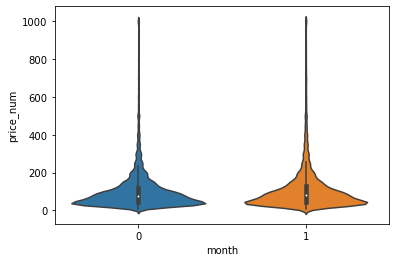

In [317]:
sns.violinplot(x = "month", y='price_num', data = df)

Would like to plot just the means with SDs, over time.

In [318]:
# What does this look like for price per person accommodated?
#df = df.drop('price_per_person', axis = 1)
df.insert(7, "price_per_person", df['price_num']/df['accommodates'])


<AxesSubplot:xlabel='month', ylabel='price_per_person'>

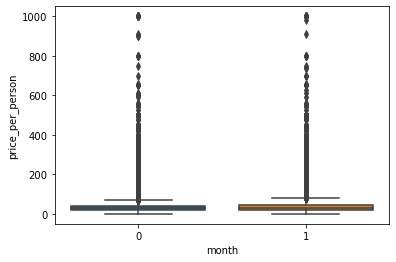

In [319]:
sns.boxplot(x=df['month'], y=(df['price_per_person']))

<AxesSubplot:xlabel='month', ylabel='price_per_person'>

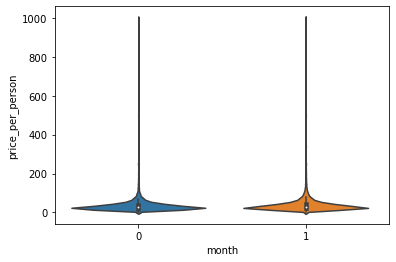

In [320]:
sns.violinplot(x = "month", y='price_per_person', data = df)

<AxesSubplot:xlabel='month', ylabel='price_per_person'>

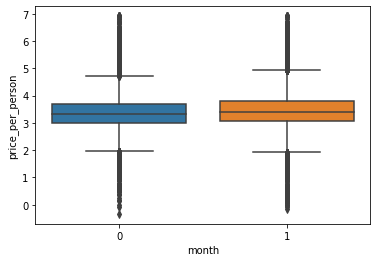

In [321]:
sns.boxplot(x=df['month'], y=np.log(df['price_per_person']))

In [322]:
# Why can't I use log?
sns.violinplot(x = "month", y=np.log('price_per_person'), data = df)

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<AxesSubplot:title={'center':'Boxplot of price vs. number of people accommodated'}, xlabel='accommodates', ylabel='price_num'>

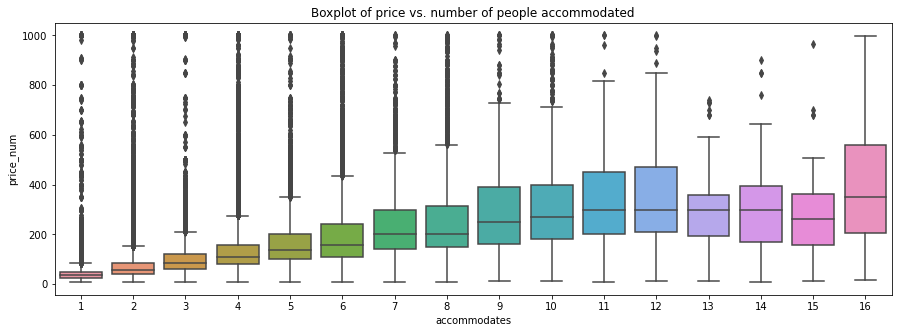

In [323]:
# How to do this by month?

plt.figure(figsize=(15, 5))
plt.title("Boxplot of price vs. number of people accommodated")

sns.boxplot(x = "accommodates", y='price_num', data = df)


In [335]:
# How to do this by month?

df[['price_num','bedrooms', 'accommodates']].corr()

,price_num,bedrooms,accommodates
price_num,1.000000,0.501483,0.515901
bedrooms,0.501483,1.000000,0.793907
accommodates,0.515901,0.793907,1.000000


# Conclusions
- Can we see any patterns at all?
- Correlation at best -> caution when interpreting.

# Part 2 - Linear regression on price variable

In [339]:
X = df[['accommodates', 'month']]
y = df['price_num']

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [341]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [342]:
print('alpha is',lr.intercept_)
print('beta is', lr.coef_)

alpha is 9.106432464320449
beta is [30.38500424 12.90724656]


In [343]:
lr.predict(X_test)

array([ 69.87644095, 100.26144519, 143.55369599, ...,  82.7836875 ,
       161.03145368, 113.16869175])

In [347]:
# Objective / loss function
test_result = pd.DataFrame({ 'predicted': lr.predict(X_test), 'actual': y_test, 'difference': lr.predict(X_test) - y_test})
test_result

,predicted,actual,difference
15120,69.876441,50.0,19.876441
41036,100.261445,250.0,-149.738555
107769,143.553696,906.0,-762.446304
98353,52.398683,100.0,-47.601317
25530,191.416458,175.0,16.416458
...,...,...,...
130992,143.553696,875.0,-731.446304
142923,82.783688,35.0,47.783688
150348,82.783688,90.0,-7.216312
15893,161.031454,284.0,-122.968546


I need to go back over the regression portion to see what else there is to do. None of the files I have seem to include this.

In [352]:
# Cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [353]:
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cross_val_score(lm, X_train, y_train, scoring='accuracy', cv=folds)

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 205, in ac

array([nan, nan, nan, nan, nan])

In [354]:
cross_val_score(lm, X_train, y_train, scoring='roc_auc', cv=folds)

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/s

array([nan, nan, nan, nan, nan])